In [2]:
import numpy as np
import pandas as pd
import time
from sklearn import datasets
import os
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy import stats

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


### Bootstrap sampling

In [2]:
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
def bootstrap(df):
    
    s = time.time()
    res = []
    for i in range(0, 1000): 
        sample = resample(df)
        res.append(sample.median())
        
    results = pd.concat([re for re in res])
    print("Bootstrap Statistics:")
    print('-------------------------')
    print('Original Mean \n', sample.median())
    print('-------------------------')
    print(f'Bias {results.mean() - df.median()}\n')
    print('-------------------------')
    print(f'Standard Error {results.std()}')

In [4]:
bootstrap(df_boston)

Bootstrap Statistics:
-------------------------
Original Mean 
 CRIM         0.286735
ZN           0.000000
INDUS        9.900000
CHAS         0.000000
NOX          0.538000
RM           6.175000
AGE         75.000000
DIS          3.112100
RAD          5.000000
TAX        332.000000
PTRATIO     19.100000
B          390.525000
LSTAT       11.680000
target      21.400000
dtype: float64
-------------------------
Bias CRIM        62.46812
ZN          62.72463
INDUS       53.03463
CHAS        62.72463
NOX         62.18663
RM          56.51613
AGE        -14.77537
DIS         59.51718
RAD         57.72463
TAX       -267.27537
PTRATIO     43.67463
B         -328.71537
LSTAT       51.36463
target      41.52463
dtype: float64

-------------------------
Standard Error 124.37017147342134


### Bootstrap Confidence Interval

1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval

In [5]:
path = 'loans_income.csv'
loans_income = pd.read_csv(os.path.join('/home/adweeb/stat101/data',path))

In [6]:
loans_income.mean()

x    68760.51844
dtype: float64

In [21]:
def confidence_intervals(loans_income, n): 
    
        sample20 = resample(loans_income, n_samples=n, replace=False)
        print(sample20.mean())
        results = []
        for nrepeat in range(500):
                sample = resample(sample20)
                results.append(sample.mean())
        results = pd.Series(results)

        try:
                confidence_interval = list(results.quantile([0.05, 0.95]))
                ax = results.plot.hist(bins=30, figsize=(4, 3))
                ax.plot(confidence_interval, [55, 55], color='black')
                for x in confidence_interval:
                        ax.plot([x, x], [0, 65], color='black')
                        ax.text(x, 70, f'{x:.0f}', 
                        horizontalalignment='center', verticalalignment='center')
                        ax.text(sum(confidence_interval) / 2, 60, '90% interval',
                        horizontalalignment='center', verticalalignment='center')

                meanIncome = results.mean()
                ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
                ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
                bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
                horizontalalignment='center', verticalalignment='center')

                ax.set_ylim(0, 80)
                ax.set_ylabel('Counts')

                plt.tight_layout()
                plt.show()
        except:

                return res


In [22]:
res = confidence_intervals(loans_income, 20)

x    80758.75
dtype: float64


### Normal Distribution

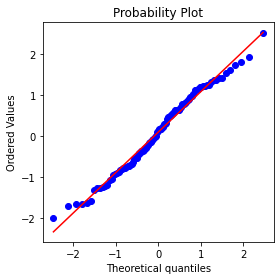

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

### Long Tailed Distribution